# Programming Exercise 1: Linear Regression
                                      

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics. In this notebook, you will be asked to complete the following functions:

-  warmUpExercise - Simple example function in Octave/MATLAB
-  computeCost - Function to compute the cost of linear regression
-  gradientDescent - Function to run gradient descent

## Instructions:

For each function, we have provided starter code for you. You will find a description of the problems followed by a box which contains some code. You will have to write your own code in these boxes to complete the four functions mentioned above. Once you run each cell, your output would be displayed. If it matches the expected output, then you should continue working through the exercise, else, you would have to try again. 

Please read the [Notebook FAQ](https://www.coursera.org/learn/machine-learning/supplement/S9fb6/jupyter-notebook-faq) to get familiar with the Jupyter environment and the commands. We also highly recommend going to your workspace to explore the files you will be working with before starting the exercise. 

To go to the workspace: press on File ==> Open. 

### NOTE:
You will find cells which contain the comment % GRADED FUNCTION: functionName. Do not edit that comment.
Those cells will be used to grade your assignment. Each block of code with that comment should only have the function. 

#### After submiting the assignment, you can [check your grades here](https://www.coursera.org/learn/machine-learning/programming/7Pjp6/linear-regression-required). 

# Warmup Exercise: 

This exercise is intended to get you used to the programming environment. Below, you will find a block of code which  shows you how to write a function in Octave. The function you are about to write should return the 5x5 identity matrix. In Octave, we return values by defining which variables represent the return values at the top of the function. All you have to do below is set A accordingly. Once you do that, press on shift-enter to run the cell under it. 


In [2]:
% GRADED FUNCTION: warmUpExercise 
function A = warmUpExercise()
A = [];
% ============= YOUR CODE HERE ==============
A = eye(5);
% ===========================================
end

In [3]:
A = warmUpExercise()

A =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1



***Expected Output***

You should see a 5 by 5 diagonal matrix.

## Linear Regression with One Variable

In this part of this exercise, you will implement linear regression with one variable to predict profits generated by a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next. The file ***[ex1data1.txt](ex1data1.txt)*** contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. 

## Plot Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)
The dataset is loaded from the data file into the variables X and y. You should run the code below to initialize your variables. To run the cell below, click on it and press shift-enter. You will not see anything happening as you run the cell, however, the variables would have been initialized.

In [4]:
warning('off'); addpath('../readonly/Assignment1a/');  % Add a path to the files                
data = load('ex1data1.txt');
X = data(:, 1);                       % population of a city
y = data(:, 2);                       % profit of a food truck in the city
m = length(y);                        % number of training examples

Now that you have initialized some variables, you could run the 'whos' function to see all your variables. You could also type 'help plot' to read the matlab/Octave's plot documentations. You should try it below.

In [5]:
% Try out the 'whos' function and the 'help plot' functions.
% Everytime you need to look at some documentation or see your variables you could run this cell. 
%-----------------------------------------------
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        A           5x5                         40  double
        X          97x1                        776  double
        ans         1x5                          5  char
        data       97x2                       1552  double
        m           1x1                          8  double
        y          97x1                        776  double

Total is 419 elements using 3157 bytes



## Plotting the data - Instructions

Now, we would like to plot our data. The next cell defines a function plotData that takes in the two parameters (x, y) and creates a figure. The function also labels the x-axis and the y-axis of the plot. In this case, the x-label is your population and the y-label is your profit. 

- To set the axis labels you should use "xlabel" and "ylabel" commands respectively. 

- As a hint, you could use the 'rx' option with plot to have the markers appear as red crosses.

- To make the markers larger you could use the following call -  plot(...,'rx','MarkerSize',10). 

Run the cells below to see a plot of the data.


In [6]:
function plotData(x, y)
% Expected to return a figure of this size.
figure('Position', [0,0,400,400]);
plot(x, y, 'rx', 'MarkerSize', 10);
ylabel('Profit in $10,000s')
xlabel('Population of City in 10,000s')
end

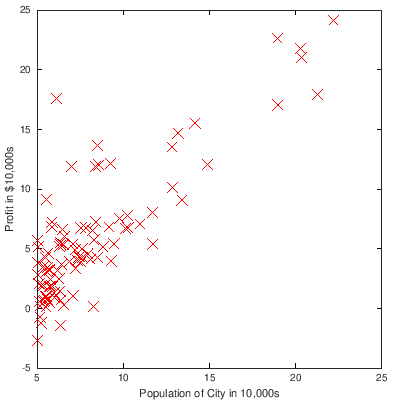

In [7]:
% Plot the Data
data = load('ex1data1.txt'); X = data(:, 1); y = data(:, 2);
plotData(X, y)

Gradient Descent
----------------

In this part, you will fit the linear regression parameters $\theta$ to
our dataset using gradient descent.

### Update Equations

The objective of linear regression is to minimize the cost function where the hypothesis $h_{\theta}(x)$ is given by the linear model
$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1 x_1
% \sum_{j=0}^n \theta_j x_j.$$ Recall that the parameters of your model are the $\theta_j$ values.
These are the values you will adjust to minimize the cost function $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update. With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.
### Implementation

We store each example as a row in the X matrix in Octave/MATLAB. To take into account the intercept term $\theta_0$, we add an additional first column to X and set it to all ones. This allows us to treat $\theta_0$ as simply another ‘feature’. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01. In this example, we decided that we will use 1500 iterations. 

### Computing the cost of $J(\theta)$ - Instructions

As you perform gradient descent to help minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In the code below, you will implement a function to calculate
$J(\theta)$ so you can check the convergence of your gradient descent implementation. As
you are doing this, remember that the variables $X$ and $y$ are not scalar values, but matrices whose rows represent the examples from the training set. Once you have completed the function below, run the cell.


In [58]:
% GRADED FUNCTION: computeCost 
function J = computeCost(X, y, theta)

m = length(y); % number of training examples - a useful value
J = 0;         % return the following variable correctly. 

% ====================== YOUR CODE HERE ======================
yhats = X * theta;
J = 1/(2*m) * sum((yhats-y).^2);
% J = round(J * 100) / 100;

% ============================================================
end

In [59]:
% Load data and initialize variables
data = load('ex1data1.txt');
X = data(:, 1);
y = data(:, 2);
m = length(y);

X = [ones(m, 1), data(:,1)];             % Add a column of ones to X to account for the intercept
theta = zeros(2, 1);                     % initialize fitting parameters

% Gradient descent settings
iterations = 1500;
alpha = 0.01;

In [60]:
computeCost(X, y, theta) % Compute and display the initial cost

ans =  32.073


***Expected Output***

You should expect to see a cost of `32.07`.

## Implement Gradient Descent - Instructions
Now that you have completed the computeCost function, you will implement gradient descent. In the cell below, the loop structure has been written for you,
and you only need to privide the updates to $\theta$ within each
iteration. As you program, make sure you understand what you are trying
to optimize and what is being updated. Keep in mind that the cost
$J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$.
That is, we minimize the value of $J(\theta)$ by changing the values of
the vector $\theta$, not by changing $X$ or $y$. A good
way to verify that gradient descent is working correctly is to look at
the value of $J(\theta)$ and check that it is decreasing with each step.
The starter code for gradientDescent calls computeCost
on every iteration and prints the cost. Assuming you have implemented
gradientDescent and computeCost correctly, your value of
$J(\theta)$ should never increase, and should converge to a steady value
by the end of the algorithm. Once you have implemented the gradient descent function run the cell below it to see if your results match our expected output. 

***The function you are about to implement should serve the following goal:***

theta = gradientDescent(X, y, theta, alpha, num_iters) updates theta by taking num_iters gradient steps with learning rate alpha. 

A debugging tip would be to print the values of the cost function (computeCost) and gradient.


In [61]:
% GRADED FUNCTION: gradientDescent 
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)

m = length(y);                   % number of training examples
J_history = zeros(num_iters, 1); % a vector to save the cost of J in every iteration

for iter = 1:num_iters
    % ====================== YOUR CODE HERE ======================
    temp = (X' * (X*theta - y));
    theta0 = theta(1) - alpha/m * sum(X*theta - y);
    theta1 = theta(2) - alpha/m * temp(2);
    
    theta(1) = theta0; 
    theta(2) = theta1;
    % ============================================================ 
    J_history(iter) = computeCost(X, y, theta);     % Save the cost J in every iteration 
end

end

In [62]:
theta = gradientDescent(X, y, theta, alpha, iterations)

theta =

  -3.6303
   1.1664



***Expected Output:***

Your theta should be: $\begin{pmatrix}
-3.630291 \\
1.166362
\end{pmatrix}$

## Plotting the linear regression 

Now that you have finished implementing computeCost and gradient descent, we will use the theta values to plot a linear fit. The result should look
something like: 
<img src="../readonly/Assignment1a/figure 1.png" width="500" height="500">
 Your final values for $\theta$ will also be used to make predictions on profits in areas of
35,000 and 70,000 people. Just run the cell below to see a plot of your model on the data and your expected output.


For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


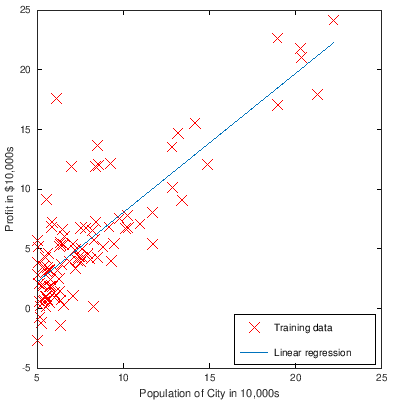

In [63]:
plotData(X(:,2),y)
hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression','Location','southeast')
hold off % don't overlay any more plots on this figure

% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n',...
    predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n',...
    predict2*10000);

***You should see the following expected output: ***

For population = 35,000, we predict a profit of 4519.767868

For population = 70,000, we predict a profit of 45342.450129

Visualizing $J(\theta)$
-----------------------

To understand the cost function $J(\theta)$ better, you will now plot
the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values.
You will not need to code anything new for this part, but you should
understand how the code you have written already is creating these
images. In the next step below, there is code set up to
calculate $J(\theta)$ over a grid of values using the computeCost
function that you wrote. After you execute the cell below, you will have a 2-D array of $J(\theta)$
values. The script below will then use these values to produce
surface and contour plots of $J(\theta)$ using the `surf` and
`contour` commands. The plots should look something like:
<img src="../readonly/Assignment1a/figure 2.png" width="700" height="700">
The purpose of these graphs is to show you how $J(\theta)$ varies
with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$
is bowl-shaped and has a global mininum. (This is easier to see in the
contour plot than in the 3D surface plot). This minimum is the optimal
point for $\theta_0$ and $\theta_1$, and each step of gradient descent
moves closer to this point. Just run the cell below to see similar graphs to the ones displayed above. 

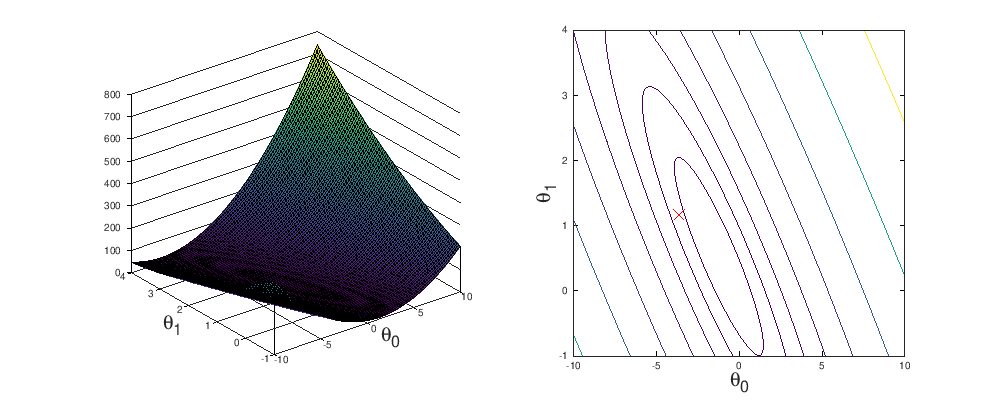

In [64]:
% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];
	  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Surface plot
figure('Position',[0,0,1000,400]);
subplot (1, 2, 1)
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0',"fontsize", 20); ylabel('\theta_1',"fontsize", 20);

% Contour plot
subplot (1, 2, 2)
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0',"fontsize", 20); ylabel('\theta_1',"fontsize", 20);
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);